<a href="https://colab.research.google.com/github/ymirandan/projetosPython/blob/main/DS%3A%20Classificacao%20de%20Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
definir se cliente sairá da empresa telefonica (churn) a partir das variaveis apresentadas

# 1: Importando os dados e noções das dimensões


In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [4]:
dados.shape

(7043, 18)

In [5]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


Percebemos diversas variáveis categóricas. Apenas uma dimensao, o valor da conta, é numérica.

Para trabalhar com algoritmo de ML, iremos transformar as variaveis categoricas em numericas

# 2 - Modificação de variaveis categoricas para variaveis binarias

In [7]:
traducao_dic = {'Sim':1,
                'Nao':0}
dados_modificados = dados[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


alternativamente, essa modificação pode ser feita com a função get_dummies da biblioteca pandas.

iremos aplica-la nas categorias restantes. para tanto, irei retirar as colunas mencionadas no codigo acima:

In [8]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'],axis=1))

dados_final = pd.concat([dados_modificados,dummie_dados],axis=1)

In [9]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


# 3 - verificando se a variavel esta balanceada (mesma proporção de 0-1)

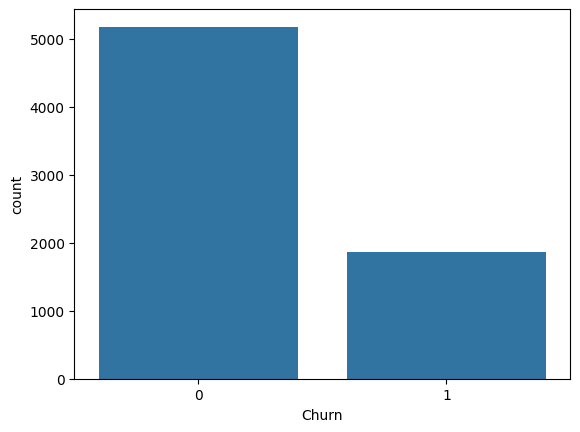

In [10]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

como está desbalanceada, fazemos:

In [11]:
# aplicação do SMOTE: separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [12]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [13]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0


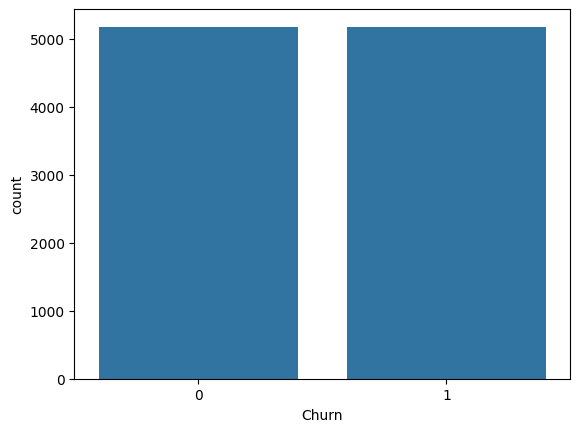

In [14]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

# 4 - Utilizando KNN (Treino e Teste)


In [16]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']


In [24]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [25]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

In [35]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

#5 - Previsao do Churn de Maria (KNN)

interesse em saber Ymaria, ou seja, se ela vai cancelar o plano ou não

In [37]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


In [38]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [39]:
 predito_maria = knn.predict(Xmaria)
 predito_maria #se 1 o churn é positivo, se 0 negativo

array([1])